In [35]:
a = 3
b = a + 5
print("a={} b={}".format(a,b))

a=3 b=8


In [36]:
!pwd

/home/jupyter/data-science-on-gcp/05_bqnotebook


In [37]:
%pip freeze

adal==1.2.2
alabaster==0.7.12
anaconda-client==1.7.2
anaconda-project==0.8.3
ansiwrap==0.8.4
appdirs==1.4.3
argh==0.26.2
arrow @ file:///home/conda/feedstock_root/build_artifacts/arrow_1588902968139/work
asn1crypto @ file:///home/conda/feedstock_root/build_artifacts/asn1crypto_1588618038116/work
astroid @ file:///home/conda/feedstock_root/build_artifacts/astroid_1588698301259/work
astropy==4.0.1.post1
async-generator==1.10
atomicwrites @ file:///home/conda/feedstock_root/build_artifacts/atomicwrites_1588182545583/work
attrs==19.3.0
autopep8==1.5.2
Babel==2.8.0
backcall==0.1.0
backports.shutil-get-terminal-size==1.0.0
bcolz==1.2.1
beautifulsoup4==4.9.0
binaryornot==0.4.4
bitarray==1.2.1
bkcharts==0.2
black==19.10b0
bleach @ file:///home/conda/feedstock_root/build_artifacts/bleach_1588608214987/work
blinker==1.4
bokeh==2.0.1
boto==2.49.0
Bottleneck==1.3.2
brotlipy==0.7.0
cachetools==3.1.1
certifi==2020.4.5.1
cffi==1.14.0
chardet==3.0.4
click==7.1.2
cloudpickle @ file:///home/conda/feedst

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [39]:
%pip install google-cloud

Note: you may need to restart the kernel to use updated packages.


In [40]:
%%bash
sudo apt-get update
sudo apt-get -y install python-mpltoolkits.basemap

Ign:1 http://deb.debian.org/debian stretch InRelease
Hit:2 http://security.debian.org stretch/updates InRelease
Hit:3 http://deb.debian.org/debian stretch-updates InRelease
Hit:4 http://deb.debian.org/debian stretch-backports InRelease
Hit:5 http://deb.debian.org/debian stretch Release
Hit:6 http://packages.cloud.google.com/apt gcsfuse-stretch InRelease
Hit:7 https://download.docker.com/linux/debian stretch InRelease
Hit:8 http://packages.cloud.google.com/apt cloud-sdk-stretch InRelease
Hit:9 http://packages.cloud.google.com/apt google-compute-engine-stretch-stable InRelease
Hit:11 http://packages.cloud.google.com/apt google-cloud-packages-archive-keyring-stretch InRelease
Hit:10 https://packages.cloud.google.com/apt kubernetes-xenial InRelease
Reading package lists...
Reading package lists...
Building dependency tree...
Reading state information...
python-mpltoolkits.basemap is already the newest version (1.0.7+dfsg-4).
0 upgraded, 0 newly installed, 0 to remove and 11 not upgraded.


In [41]:
%%html
This cell will print out a <b> HTML </b> string.

In [42]:
%%bigquery
SELECT 
  COUNTIF(arr_delay >= 15)/COUNT(arr_delay) AS frac_delayed
FROM flights.tzcorr

,frac_delayed
0,0.184523


In [43]:
%%bigquery df
SELECT ARR_DELAY, DEP_DELAY
FROM flights.tzcorr
WHERE DEP_DELAY >= 10 AND RAND() < 0.01

In [44]:
df.describe()

,ARR_DELAY,DEP_DELAY
count,13828.000000,13904.000000
mean,45.886752,50.733386
std,64.510964,62.994491
min,-43.000000,10.000000
25%,11.000000,17.000000
50%,26.000000,30.000000
75%,58.000000,60.000000
max,1265.000000,1258.000000


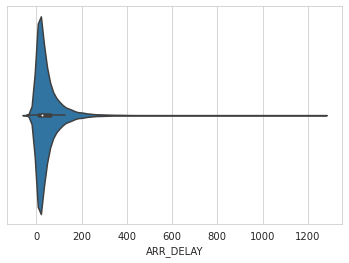

In [45]:
sns.set_style("whitegrid")
ax = sns.violinplot(data=df, x='ARR_DELAY', inner='box', orient='h')
#ax.axes.set_xlim(0, 30)

In [46]:
%%bigquery df
SELECT ARR_DELAY, DEP_DELAY
FROM flights.tzcorr
WHERE RAND() < 0.001

In [47]:
df.describe()

,ARR_DELAY,DEP_DELAY
count,6087.000000,6105.000000
mean,4.377033,9.317281
std,39.235162,36.998398
min,-66.000000,-22.000000
25%,-13.000000,-5.000000
50%,-5.000000,-2.000000
75%,7.500000,7.000000
max,1101.000000,1112.000000


In [48]:
df['ontime'] = df['DEP_DELAY'] < 10
df[df['ARR_DELAY'] > 0].head()

,ARR_DELAY,DEP_DELAY,ontime
2,14.0,0.0,True
6,3.0,-1.0,True
7,40.0,30.0,False
21,5.0,-2.0,True
25,9.0,9.0,True


(-50.0, 200.0)

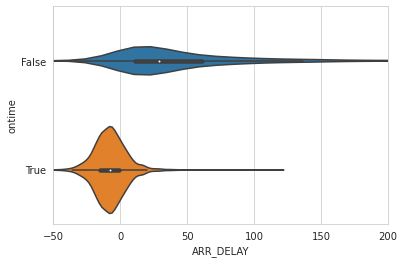

In [49]:
import seaborn as sns
sns.set_style("whitegrid")
ax = sns.violinplot(data=df, x='ARR_DELAY', y='ontime', inner='box', orient='h')
ax.set_xlim(-50, 200)

(-50.0, 50.0)

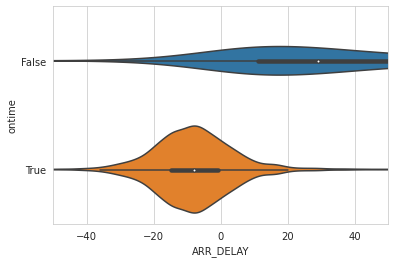

In [50]:
ax = sns.violinplot(data=df, x='ARR_DELAY', y='ontime', 
                    inner='box', orient='h', gridsize=1000)
ax.set_xlim(-50, 50)

In [51]:
%%bigquery depdelay
SELECT
  *
FROM (
  SELECT
    DEP_DELAY,
    AVG(ARR_DELAY) AS arrival_delay,
    STDDEV(ARR_DELAY) AS stddev_arrival_delay,
    COUNT(ARR_DELAY) AS numflights
  FROM
    `flights.tzcorr`
  GROUP BY
    DEP_DELAY )
WHERE
  numflights > 370
ORDER BY
  DEP_DELAY

In [52]:
depdelay[:5]

,DEP_DELAY,arrival_delay,stddev_arrival_delay,numflights
0,-23.0,-24.005747,11.095207,522
1,-22.0,-23.258693,12.300774,719
2,-21.0,-22.606495,12.094192,1047
3,-20.0,-21.538365,12.075209,1590
4,-19.0,-20.591874,12.133052,2215


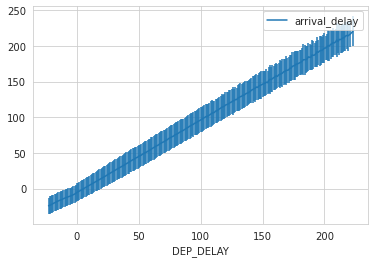

In [53]:
ax = depdelay.plot(kind='line', x='DEP_DELAY', 
              y='arrival_delay', yerr='stddev_arrival_delay')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


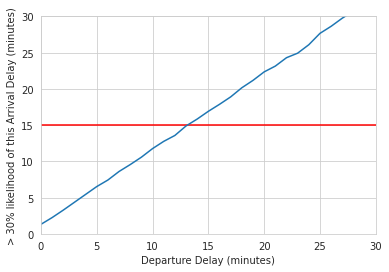

In [54]:
import matplotlib.pyplot as plt
Z_30 = 0.52
depdelay['arr_delay_30'] = (Z_30 * depdelay['stddev_arrival_delay']) \
             + depdelay['arrival_delay']
plt.axhline(y=15, color='r')
ax = plt.axes()
depdelay.plot(kind='line', x='DEP_DELAY', y='arr_delay_30',
              ax=ax, ylim=(0,30), xlim=(0,30), legend=False)
ax.set_xlabel('Departure Delay (minutes)')
ax.set_ylabel('> 30% likelihood of this Arrival Delay (minutes)');

In [55]:
%%bigquery depdelay
SELECT
  DEP_DELAY,
  arrival_delay,
  numflights
FROM (
  SELECT
    DEP_DELAY,
    APPROX_QUANTILES(ARR_DELAY,
      101)[OFFSET(70)] AS arrival_delay,
    COUNT(ARR_DELAY) AS numflights
  FROM
    `flights.tzcorr`
  GROUP BY
    DEP_DELAY )
WHERE
  numflights > 370
ORDER BY
  DEP_DELAY

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


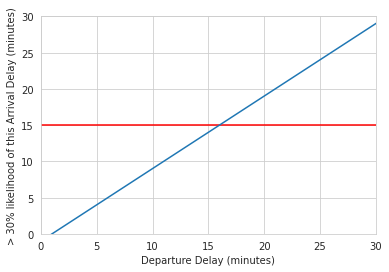

In [56]:
plt.axhline(y=15, color='r')
ax = plt.axes()
depdelay.plot(kind='line', x='DEP_DELAY', y='arrival_delay',
              ax=ax, ylim=(0,30), xlim=(0,30), legend=False)
ax.set_xlabel('Departure Delay (minutes)')
ax.set_ylabel('> 30% likelihood of this Arrival Delay (minutes)');

In [57]:
%%bigquery depdelay
SELECT
  DEP_DELAY,
  arrival_delay,
  numflights
FROM (
  SELECT
    DEP_DELAY,
    APPROX_QUANTILES(ARR_DELAY,
      101)[OFFSET(70)] AS arrival_delay,
    COUNT(ARR_DELAY) AS numflights
  FROM
    `flights.tzcorr` f
  JOIN
    `flights.trainday` t
  ON
    f.FL_DATE = t.FL_DATE
  WHERE
    t.is_train_day = 'True'
  GROUP BY
    DEP_DELAY )
WHERE
  numflights > 370
ORDER BY
  DEP_DELAY

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


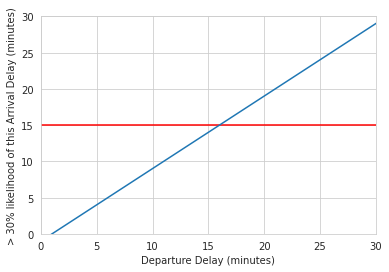

In [58]:
plt.axhline(y=15, color='r')
ax = plt.axes()
depdelay.plot(kind='line', x='DEP_DELAY', y='arrival_delay',
              ax=ax, ylim=(0,30), xlim=(0,30), legend=False)
ax.set_xlabel('Departure Delay (minutes)')
ax.set_ylabel('> 30% likelihood of this Arrival Delay (minutes)');

In [59]:
%%bigquery eval
SELECT
  SUM(IF(DEP_DELAY < 16
      AND arr_delay < 15, 1, 0)) AS correct_nocancel,
  SUM(IF(DEP_DELAY < 16
      AND arr_delay >= 15, 1, 0)) AS wrong_nocancel,
  SUM(IF(DEP_DELAY >= 16
      AND arr_delay < 15, 1, 0)) AS wrong_cancel,
  SUM(IF(DEP_DELAY >= 16
      AND arr_delay >= 15, 1, 0)) AS correct_cancel
FROM (
  SELECT
    DEP_DELAY,
    ARR_DELAY
  FROM
    `flights.tzcorr` f
  JOIN
    `flights.trainday` t
  ON
    f.FL_DATE = t.FL_DATE
  WHERE
    t.is_train_day = 'False' )

In [60]:
print(eval['correct_nocancel'] /
      (eval['correct_nocancel'] + eval['wrong_nocancel']))
print(eval['correct_cancel'] / 
      (eval['correct_cancel'] + eval['wrong_cancel']))

0    0.950408
dtype: float64
0    0.802263
dtype: float64


In [62]:
eval.head()

,correct_nocancel,wrong_nocancel,wrong_cancel,correct_cancel
0,1389162,72486,58359,236776


In [63]:
%%bigquery eval
SELECT
  SUM(IF(DEP_DELAY = 15
      AND arr_delay < 15, 1, 0)) AS correct_nocancel,
  SUM(IF(DEP_DELAY = 15
      AND arr_delay >= 15, 1, 0)) AS wrong_nocancel,
  SUM(IF(DEP_DELAY = 16
      AND arr_delay < 15, 1, 0)) AS wrong_cancel,
  SUM(IF(DEP_DELAY = 16
      AND arr_delay >= 15, 1, 0)) AS correct_cancel
FROM (
  SELECT
    DEP_DELAY,
    ARR_DELAY
  FROM
    `flights.tzcorr` f
  JOIN
    `flights.trainday` t
  ON
    f.FL_DATE = t.FL_DATE
  WHERE
    t.is_train_day = 'False' )

In [64]:
eval.head()

,correct_nocancel,wrong_nocancel,wrong_cancel,correct_cancel
0,8474,3179,7459,3195


In [65]:
print(eval['correct_nocancel'] / (eval['correct_nocancel'] + eval['wrong_nocancel']))
print(eval['correct_cancel'] / (eval['correct_cancel'] + eval['wrong_cancel']))

0    0.727195
dtype: float64
0    0.299887
dtype: float64


In [66]:
!bq mk temp_dataset

Dataset 'data-science-college:temp_dataset' successfully created.


In [67]:
%%bigquery
CREATE OR REPLACE TABLE temp_dataset.delays
AS

SELECT
  DEP_DELAY,
  arrival_delay,
  numflights
FROM (
  SELECT
    DEP_DELAY,
    APPROX_QUANTILES(ARR_DELAY,
      101)[OFFSET(70)] AS arrival_delay,
    COUNT(ARR_DELAY) AS numflights
  FROM
    `flights.tzcorr` f
  JOIN
    `flights.trainday` t
  ON
    f.FL_DATE = t.FL_DATE
  WHERE
    t.is_train_day = 'True'
  GROUP BY
    DEP_DELAY )
WHERE
  numflights > 370
ORDER BY
  DEP_DELAY

""


In [68]:
!bq rm -f temp_dataset.delays
!bq rm -f temp_dataset

In [ ]:
#I Putu Krisna
#23501810004